# Getting started

__Description :__<br>
The dataset contains details of individuals insured with a Healthcare Organization and how much they incur insurance premium expenses.Health insurance cost prediction involves estimating the cost of health insurance premiums or claims based on factors like age, gender, Bmi, childern, smoker, and other relevant data. This is typically done using data analysis and machine learning techniques.<br>

_Attribute Information:_
- age - Insurance holder's age in years
- sex - Gender of the insurance holder (Male or Female)
- bmi - BMI stands for Body Mass Index, the ideal range according to height and weight is 18.5 to 24.9
- children - Number of children
- smoker - Whether the insurance holder is a smoker or not
- region - Residential area of the person
- expenses - Individual medical costs billed by health insurance

__Problem Statement :__<br>
Develop a solution to predict the insurance premium for health insurance holders.
 
            


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


# Data Preprocessing

In [2]:
import numpy as np
import pandas as pd

In [3]:
# loading and reading dataset
file_path = 'insurance.csv'
df=pd.read_csv(r"C:\Users\sures\project\env\insurance.csv")
df 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
#data information 
df.info("C:/Users/sures/project/insurance.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# read the first 8 elements
df = pd.read_csv(r"C:\Users\sures\project\env\insurance.csv")
print(df.head(8))

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560


In [6]:
# read the last 8 elemrnts in the dataset
df = pd.read_csv(r"C:\Users\sures\project\env\insurance.csv")
print(df.tail(8))

      age     sex    bmi  children smoker     region      charges
1330   57  female  25.74         2     no  southeast  12629.16560
1331   23  female  33.40         0     no  southwest  10795.93733
1332   52  female  44.70         3     no  southwest  11411.68500
1333   50    male  30.97         3     no  northwest  10600.54830
1334   18  female  31.92         0     no  northeast   2205.98080
1335   18  female  36.85         0     no  southeast   1629.83350
1336   21  female  25.80         0     no  southwest   2007.94500
1337   61  female  29.07         0    yes  northwest  29141.36030


## Data exploration
To gain insights into the data, we'll employ diverse methods for thorough exploration.

In [7]:
# check for missing values
df = pd.read_csv(r"C:\Users\sures\project\env\insurance.csv")
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# describing the data
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.describe(include='object').T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


- The age range starts from 18 to 64 years, with the youngest and oldest individuals.
- BMI values vary between 16 and 53, notably diverging from the ideal range of 18 to 25.
- On average, insurance holders file claims of 13270.42 USD, with the maximum claim at 63770.43 USD.
- A quarter of insurance holders (25%) claim sums exceeding 16639.91 USD.

In [10]:
#checking duplicate values 
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [11]:
#column to list 
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [12]:
# shape of the data
df.shape

(1338, 7)

In [13]:
df.duplicated().sum()

np.int64(1)

In [14]:
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


- The dataset comprises 1338 rows and 7 columns.
- No missing values are present in the dataset.
- There is only one duplicated value.

# Exploratory data analysis (EDA)

In [15]:
df = df.copy()

In [16]:
plt.rcParams['figure.figsize'] = (10, 6)

<Axes: xlabel='smoker', ylabel='charges'>

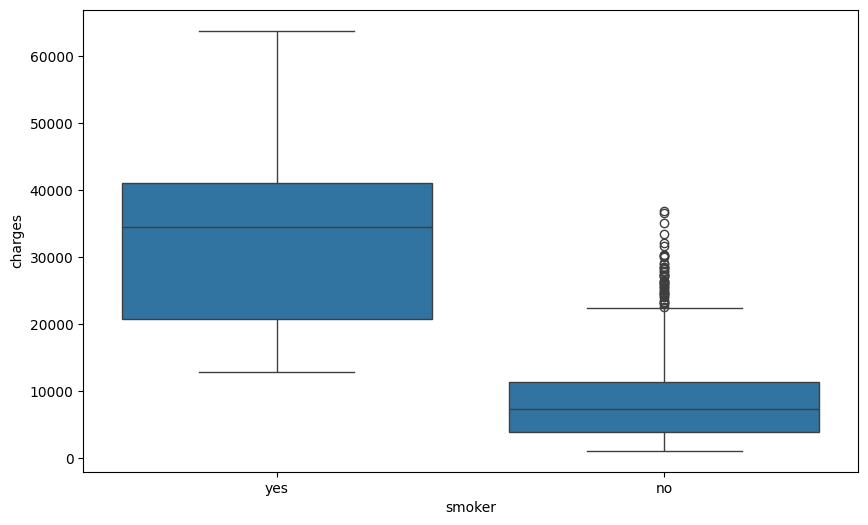

In [17]:
sns.boxplot(x='smoker',y='charges',data=df)

<Axes: xlabel='sex', ylabel='charges'>

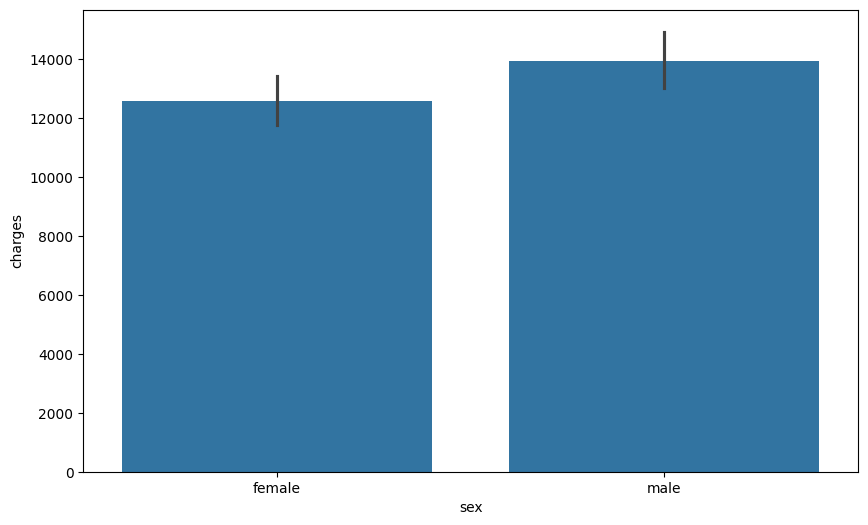

In [18]:
sns.barplot(x='sex', y='charges', data=df)

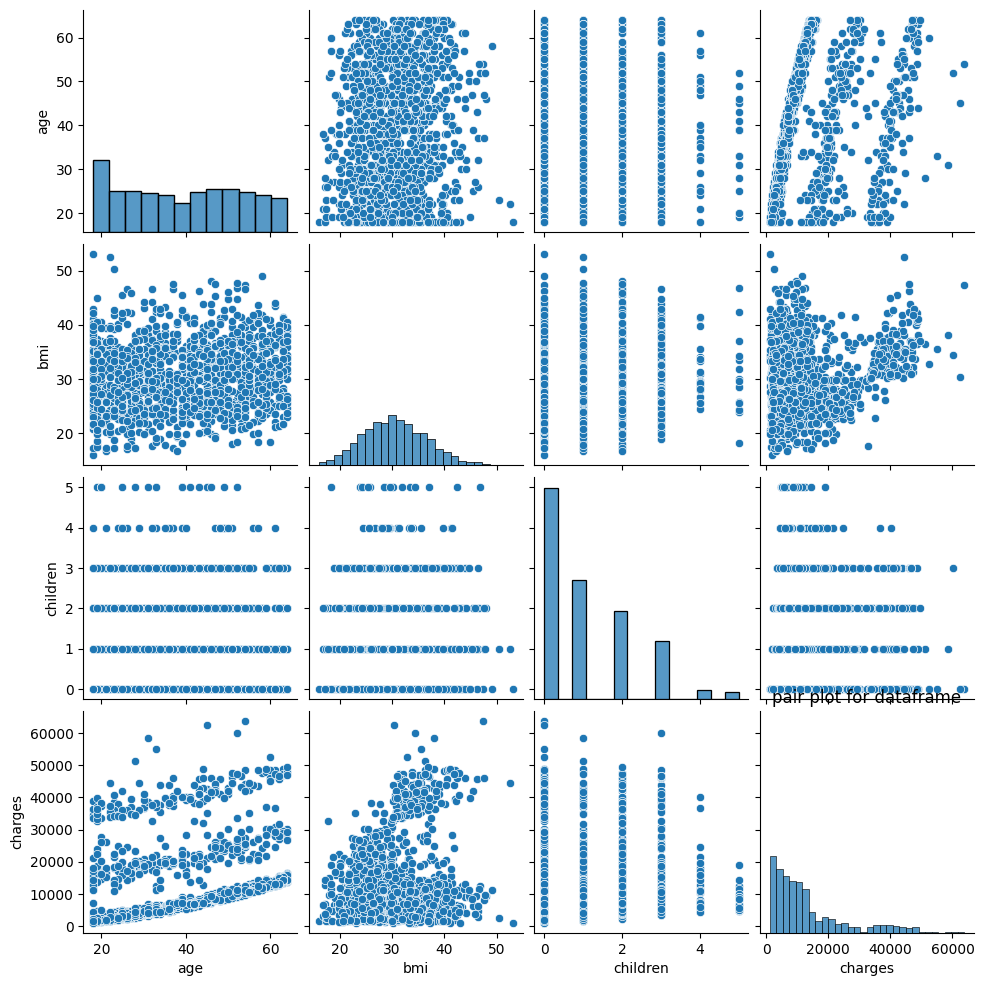

In [19]:
sns.pairplot(df)
plt.title('pair plot for dataframe')
plt.show()

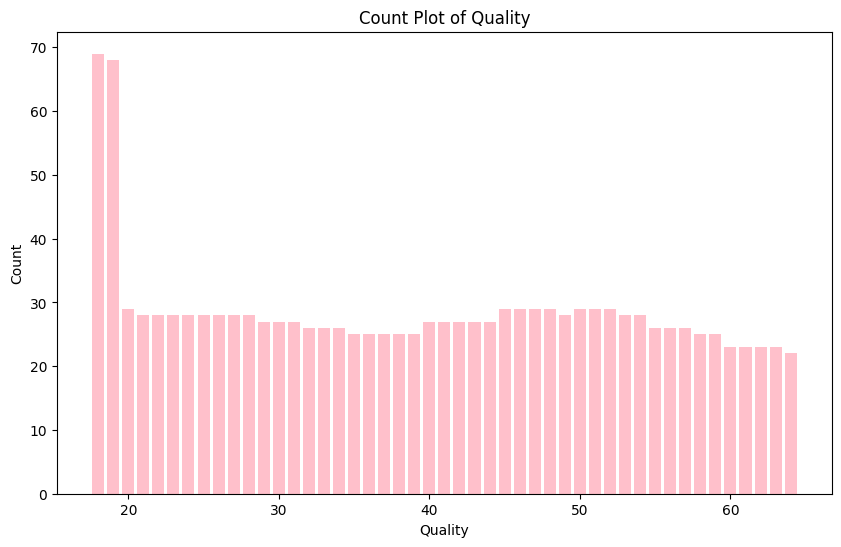

In [20]:
age_counts = df['age'].value_counts()
plt.bar(age_counts.index, age_counts, color='pink')
plt.title('Count Plot of Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

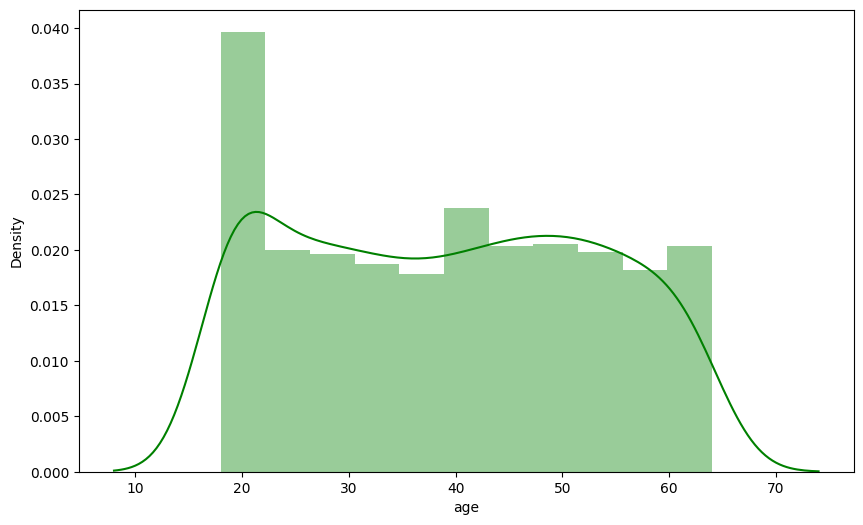

In [21]:
sns.distplot(df['age'], color = 'g');

- The age groups 20-24 and 40-44 constitute the highest number of healthcare insurance holders.

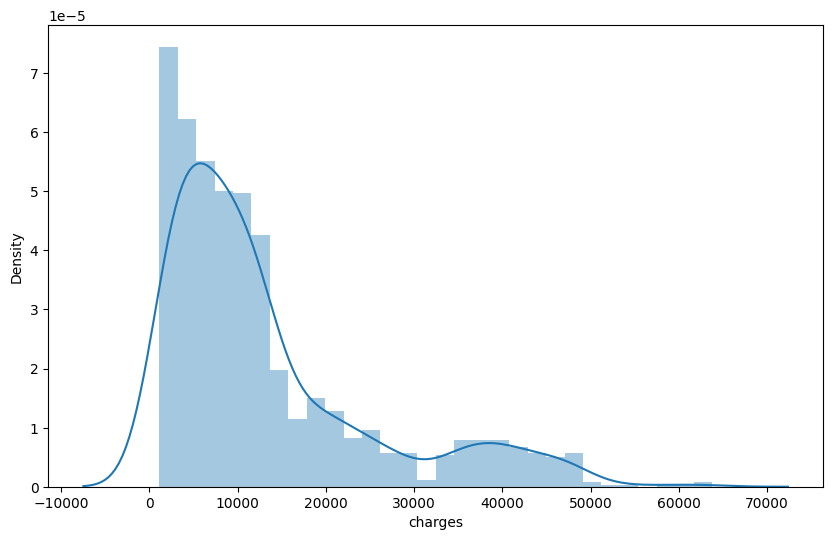

In [22]:
sns.distplot(df['charges']);

In [23]:
num_df = df.select_dtypes(exclude='object')
num_df

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


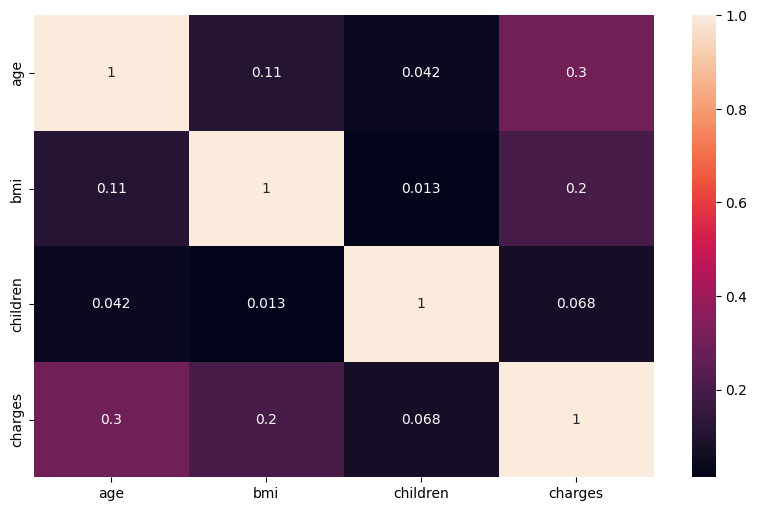

In [24]:
sns.heatmap(num_df.corr(), annot = True);

The "children" and "expenses" features exhibit a noticeable correlation, as do the "children" and "age" features, which is to be expected.

## Conclusion

Summarizing the key insights obtained:

- A quarter of insurance holders (25%) claim sums exceeding 16,639.91 USD.
- Majority of individuals are from the southeast region, and they tend to incur the highest charges.
- There's a significant rise in expenses as age increases.
- Non-smokers demonstrate lower vulnerability to higher charges.
- Smokers with a BMI exceeding 30 display a higher likelihood of claiming over 30,000 USD.

# FEATURE ENGINEERING

# One Hot Encoding


In [25]:
numericalcolumn = ('age','bmi','children')
categorycolumn = ('sex','smoker','region')

In [26]:
numericalcolumn

('age', 'bmi', 'children')

In [27]:
categorycolumn

('sex', 'smoker', 'region')

# Model Building

In [28]:
import numpy as np
import pandas as pd

# feature scaling and encoding
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# train and testing data
from sklearn.model_selection import train_test_split

# regression evaluation metrics
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error, mean_absolute_error

# models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import pickle

## Data pre-processing

In [29]:
df = df.copy()

In [30]:
def preprocess_inputs(df):
    df = df.copy()

    # splitting the dataset into X and y
    X = df.drop('charges', axis=1)
    y = df['charges']

    # train test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

    # categorical columns
    cat_cols = ['sex', 'smoker', 'region']

    # numerical columns
    num_cols = ['age', 'bmi', 'children']

    # one hot encode categorical columns
    encoder = OneHotEncoder(sparse_output=False)

    x_train_encode = encoder.fit_transform(x_train[cat_cols])
    x_test_encode = encoder.transform(x_test[cat_cols])

    x_train_encoded = pd.DataFrame(x_train_encode, index=x_train.index, columns=encoder.get_feature_names_out(cat_cols))
    x_test_encoded = pd.DataFrame(x_test_encode, index=x_test.index, columns=encoder.get_feature_names_out(cat_cols))

    # scale numerical columns
    scaler = StandardScaler()
    
    x_train_scale = scaler.fit_transform(x_train[num_cols])
    x_test_scale = scaler.transform(x_test[num_cols])

    x_train_scaled = pd.DataFrame(x_train_scale, index=x_train.index, columns=num_cols)
    x_test_scaled = pd.DataFrame(x_test_scale, index=x_test.index, columns=num_cols)

    # concatenate numerical and categorical features
    x_train = pd.concat([x_train_scaled, x_train_encoded], axis=1)
    x_test = pd.concat([x_test_scaled, x_test_encoded], axis=1)

    return x_train, x_test, y_train, y_test, encoder, scaler

In [31]:
x_train, x_test, y_train, y_test, encoder, scaler = preprocess_inputs(df)

In [32]:
print(f'x_train shape {x_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'x_test shape {x_test.shape}')
print(f'y_test shape {y_test.shape}')

x_train shape (1070, 11)
y_train shape (1070,)
x_test shape (268, 11)
y_test shape (268,)


In [33]:
x_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1306,-0.718505,-1.437015,-0.915145,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
124,0.558926,0.521715,1.606414,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
588,1.552484,0.845599,-0.915145,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1127,-0.292695,0.837482,0.765894,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
201,0.629894,0.248158,-0.074626,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [34]:
y_train.head()

1306    16115.30450
124     10115.00885
588     13635.63790
1127     5836.52040
201      8871.15170
Name: charges, dtype: float64

In [35]:
x_test.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
12,-1.144316,0.600453,-0.915145,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
306,-0.789474,-0.519748,0.765894,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
318,0.346021,-0.496208,-0.915145,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
815,-1.357221,0.123150,-0.915145,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
157,-1.499158,-0.897208,-0.915145,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [36]:
y_test.head()

12      1826.84300
306    20177.67113
318     7421.19455
815     1877.92940
157    15518.18025
Name: charges, dtype: float64

## Model Assessment

**1. Linear Regression** 

In [37]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [38]:
y_pred= model.predict(x_test)

In [39]:
r2_score(y_pred, y_test)

0.713836781528016

In [40]:
mean_absolute_error(y_pred, y_test)

3916.4377758106107

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
mse= mean_squared_error(y_test,y_pred)
r2= r2_score(y_test,y_pred)
print(f"Mean Squared Error:{mse:.2f}")
print(f"R_squared:{r2:.2f}")

Mean Squared Error:32193193.04
R_squared:0.79


**2. Decision Tree**

In [42]:
model = DecisionTreeRegressor()

model.fit(x_train, y_train)

DecisionTreeRegressor()

**3. KNN**

In [43]:
model_knn = KNeighborsRegressor()

model_knn.fit(x_train, y_train)

KNeighborsRegressor()

In [44]:
y_pred_knn = model_knn.predict(x_test)

knn_mse = mean_squared_error(y_test, y_pred_knn)
knn_rmse = root_mean_squared_error(y_test, y_pred_knn)
knn_mae = mean_absolute_error(y_test, y_pred_knn)
knn_r2_score = r2_score(y_test, y_pred_knn)

print(f"Mean squared error using KNN is {knn_mse}")
print(f"Root mean squared error using KNN is {knn_rmse}")
print(f"Mean absolute error using KNN is {knn_mae}")
print(f"r2_score using KNN is {knn_r2_score}")

Mean squared error using KNN is 33152732.447201118
Root mean squared error using KNN is 5757.840953621515
Mean absolute error using KNN is 3705.8595823843284
r2_score using KNN is 0.7885776530631965


**4. Random Forest**

In [45]:
model_rf = RandomForestRegressor()

model_rf.fit(x_train, y_train)

RandomForestRegressor()

In [46]:
y_pred_lr = model_rf.predict(x_test)

random_forest_mse = mean_squared_error(y_test, y_pred_lr)
random_forest_rmse = root_mean_squared_error(y_test, y_pred_lr)
random_forest_mae = mean_absolute_error(y_test, y_pred_lr)
random_forest_r2_score = r2_score(y_test, y_pred_lr)

print(f"Mean Squared Error using Random Forest Regressor : {random_forest_mse}")
print(f"Root Mean Squared Error using Random Forest Regressor : {random_forest_rmse}")
print(f"Mean Absolute Error using Random Forest Regressor : {random_forest_mae}")
print(f"r2_score Error using Random Forest Regressor : {random_forest_r2_score}")

Mean Squared Error using Random Forest Regressor : 20303900.83231583
Root Mean Squared Error using Random Forest Regressor : 4505.985001341641
Mean Absolute Error using Random Forest Regressor : 2757.1384139891475
r2_score Error using Random Forest Regressor : 0.8705175094458093


**5. Gradient Boosting**

In [47]:
model_gb = GradientBoostingRegressor()

model_gb.fit(x_train, y_train)

GradientBoostingRegressor()

In [48]:
y_pred_gb = model_gb.predict(x_test)

gradient_boosting_mse = mean_squared_error(y_test, y_pred_gb)
gradient_boosting_rmse = root_mean_squared_error(y_test, y_pred_gb)
gradient_boosting_mae = mean_absolute_error(y_test, y_pred_gb)
gradient_boosting_r2_score = r2_score(y_test, y_pred_gb)

print(f"Mean Squared Error using Gradient Boosting Regressor : {gradient_boosting_mse}")
print(f"Root Mean Squared Error using Gradient Boosting Regressor : {gradient_boosting_rmse}")
print(f"Mean Absolute Error using Gradient Boosting Regressor : {gradient_boosting_mae}")
print(f"r2_sccore using Gradient Boosting Regressor : {gradient_boosting_r2_score}")

Mean Squared Error using Gradient Boosting Regressor : 15867630.187637102
Root Mean Squared Error using Gradient Boosting Regressor : 3983.4194089547113
Mean Absolute Error using Gradient Boosting Regressor : 2380.022130455702
r2_sccore using Gradient Boosting Regressor : 0.8988085938334555


In [49]:
y_pred_knn = model_knn.predict(x_test)

knn_mse = mean_squared_error(y_test, y_pred_knn)
knn_rmse = root_mean_squared_error(y_test, y_pred_knn)
knn_mae = mean_absolute_error(y_test, y_pred_knn)
knn_r2_score = r2_score(y_test, y_pred_knn)

print(f"Mean squared error using KNN is {knn_mse}")
print(f"Root mean squared error using KNN is {knn_rmse}")
print(f"Mean absolute error using KNN is {knn_mae}")
print(f"r2_score using KNN is {knn_r2_score}")

Mean squared error using KNN is 33152732.447201118
Root mean squared error using KNN is 5757.840953621515
Mean absolute error using KNN is 3705.8595823843284
r2_score using KNN is 0.7885776530631965


## Save the best model

In [50]:
## save encoder
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

## load encoder
# with open('encoder.pkl', 'rb') as f:
#     encoder = pickle.load(f)

In [51]:
## save scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

## load scaler
# with open('scaler.pkl', 'rb') as f:
#     s = pickle.load(f)

In [52]:
## save model
with open('model.pkl', 'wb') as f:
    pickle.dump(model_gb, f)

In [53]:
## load model
with open('model.pkl', 'rb') as f:
    m = pickle.load(f)